# Simple draft experiment using BigARTM Python API

Here one can find a code to understand how to work with [BigARTM](http://bigartm.org) and build shallow and hierarchical models.

Before you can run script, you should collect dataset and install BigARTM.
You can find instructions in [README](https://github.com/src-d/snippet-ranger).

To install BigARTM you can use script from [./helpers/install_bigartm.sh](https://github.com/src-d/snippet-ranger/tree/master/helpers/install_bigartm.sh)

In [1]:
import glob
import os
import logging

import artm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

logging.basicConfig(level=logging.INFO)
log = logging.getLogger("bigARTM_experiment")
log.info("artm version: {}".format(artm.version()))

INFO:bigARTM_experiment:artm version: 0.8.3


In [2]:
seed = 42
# BigARTM optimisation params
num_topics = 50  # topics numbers
cache_theta = True
num_document_passes = 1
num_collection_passes_output = 1
num_collection_passes_full = 35

In [3]:
# Please change it to your data directory.
data_dir = "/storage/konstantin/data/"  
fc = "_fc"
libname = "matplotlib" + fc
# from where load vowpal_wabbit dataset
vw_path = os.path.join(data_dir, "vowpal_wabbit/vw_{}.txt".format(libname))

# where to save batches for BigARTM
batches_dir = os.path.join(data_dir, "batches/{}/".format(libname))
# where to save BigARTM model
artm_model_dir = os.path.join(data_dir, "models/hartm_{}/".format(libname))  
# where to save dictionary for BigARTM
dict_path = os.path.join(batches_dir, "artm.dict")

In [4]:
if not os.path.exists(batches_dir):
    log.info("Batches directory does not exists, create new batches from vowpal_wabbit format")
    batch_vectorizer = artm.BatchVectorizer(
        data_path=vw_path, data_format="vowpal_wabbit", collection_name=libname, target_folder=batches_dir)
    batch_vectorizer.dictionary.save(dict_path)
    dictionary = batch_vectorizer.dictionary
else:
    log.info("Batches directory found. Use batches from it and dictionary from dict_path.")
    batch_vectorizer = artm.BatchVectorizer(
        data_path=batches_dir, data_format="batches", collection_name=libname)
    dictionary = artm.Dictionary(name=None, dictionary_path=dict_path, data_path=batches_dir)

INFO:bigARTM_experiment:Batches directory found. Use batches from it and dictionary from dict_path.


In [5]:
# important info output
log.info("num_batches: %d", batch_vectorizer.num_batches)
log.info("batch_size : %d", batch_vectorizer.batch_size)
log.info("num_topics : %d", num_topics)

INFO:bigARTM_experiment:num_batches: 311
INFO:bigARTM_experiment:batch_size : 1000
INFO:bigARTM_experiment:num_topics : 50


In [6]:
# whitch scores BigARTM model should calculate during optimization
scores = [
    artm.PerplexityScore(name='PerplexityScore', dictionary=dictionary),
    artm.SparsityPhiScore(name='SparsityPhiScore'),
    artm.SparsityThetaScore(name='SparsityThetaScore'),
    artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.3),
    artm.TopTokensScore(name='TopTokensScore', num_tokens=10),
         ]

# Add regularizers to BigARTM model. 
# Check out http://bigartm.readthedocs.io/en/latest/tutorials/regularizers_descr.html
regularizers = [
    artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.001),
    artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.001),
               ]

model_artm = artm.ARTM(num_topics=num_topics, 
                       dictionary=dictionary, 
                       scores=scores, 
                       regularizers=regularizers,
                       num_document_passes=num_document_passes,
                       cache_theta=cache_theta,
                       show_progress_bars=True,
                       theta_columns_naming='title')

model_artm.initialize(dictionary=dictionary)

In [7]:
def print_measures(model_artm):
    """
    Helper function to output score info
    """
    for key in model_artm.score_tracker:
        if hasattr(model_artm.score_tracker[key], "last_value"):
            print('{}: {}{:10.3f}'.format(key, " " * ( 20 - len(key)), model_artm.score_tracker[key].last_value))

    print('Kernel contrast:      {:10.3f}'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity:        {0:10.3f}'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))
    
    print()

## Train model

In [8]:
def train_model(model_artm, print_measures_flag=False):
    if print_measures_flag:
        for i in range(num_collection_passes_full):
            model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=num_collection_passes_output)
            print_measures(model_artm)
    else:
        model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=num_collection_passes_full)
        print_measures(model_artm)
train_model(model_artm)

HBox(children=(IntProgress(value=0, description='Pass: ', max=35), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Batch: ', max=311), HTML(value='')))


SparsityPhiScore:          0.979
SparsityThetaScore:        0.769
PerplexityScore:           6.553
Kernel contrast:           0.964
Kernel purity:             1.000



## Get Perplexity Score plot

Can help to get if model has converged or not

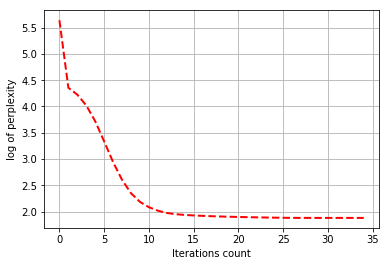

In [9]:
y = model_artm.score_tracker['PerplexityScore'].value
x = range(len(y))
plt.plot(x, np.log(y), 'r--', linewidth=2)
plt.xlabel("Iterations count")
plt.ylabel("log of perplexity")
plt.grid(True)
plt.show()

In [10]:
# Get most valuable topic tokens to understand topic model better.
for topic_name in model_artm.topic_names:
    print(topic_name + ': ', model_artm.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0:  ['plot']
topic_1:  ['plot', 'semilogx', 'paint']
topic_2:  ['scatter', 'arrow', 'normpdf', 'delay', 'spring', 'bone']
topic_3:  ['legend', 'get', 'showtip', 'hidetip', 'revcmap']
topic_4:  ['ylabel', 'xlabel', 'yscale', 'xscale', 'title', 'legend', 'plot', 'ylim']
topic_5:  ['savefig', 'ion', 'violinplot', 'ioff', 'color', 'summer', 'winter', 'figure']
topic_6:  ['write', 'specgram', 'circle', 'cvt', 'data', 'autumn']
topic_7:  ['use', 'box', 'main', 'step', 'axhspan', 'scaled', 'center', 'polar', 'rgrids', 'movavg']
topic_8:  ['join', 'matshow', 'mkdirs', 'figaspect', 'spectral']
topic_9:  ['pop', 'connect', 'resize']
topic_10:  ['remove', 'hold', 'ishold', 'detrend', 'sci', 'inner', 'triplot', 'barbs', 'tricontour', 'spy']
topic_11:  ['sqrt', 'strftime', 'scale', 'start', 'end', 'reset', 'element', 'fix', 'interpgrid', 'accept']
topic_12:  ['type', 'flush', 'param', 'iternext', 'axisinfo', 'mutatedx', 'myiter', 'prism']
topic_13:  ['keys', 'values', 'cycler', 'drange', 'con

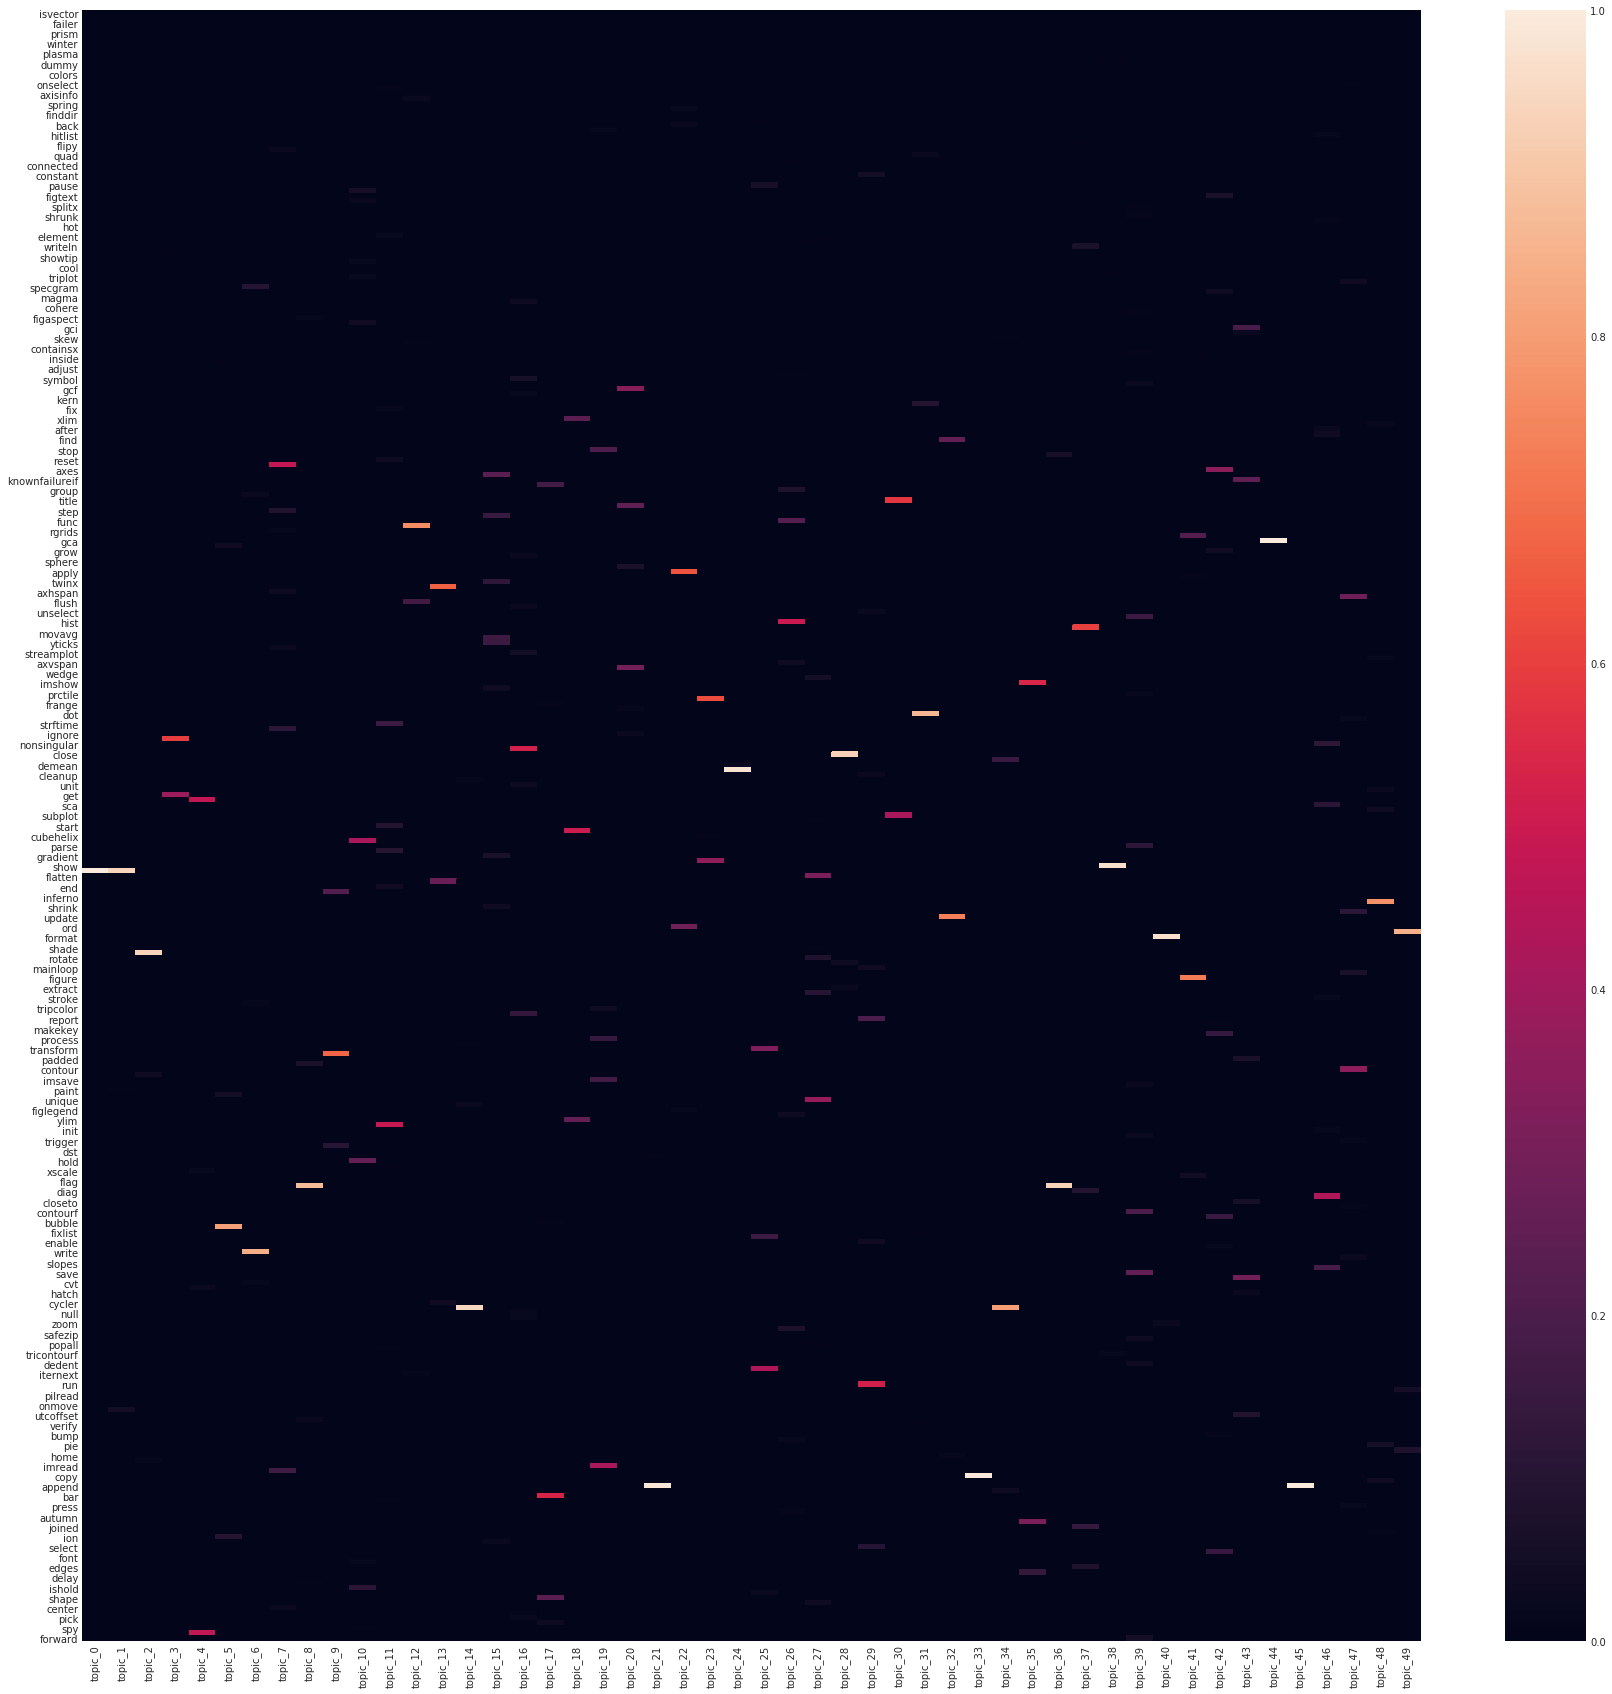

In [11]:
# Plot topic-token matrix.
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(30, 30))
sns.heatmap(model_artm.phi_)

In [12]:
# Save topic-token (phi) and token-snippet (theta) matrixes
model_artm.phi_.to_csv(os.path.join(data_dir, "matlab_phi_mat.tsv"), sep='\t',header=False, index=False)
with open(os.path.join(data_dir, "matlab_phi_indx.tsv"), "w") as f:
    f.write("\n".join(list(model_artm.phi_.index)) + '\n')
os.chmod(os.path.join(data_dir, "matlab_phi_mat.tsv"), 0o666)
os.chmod(os.path.join(data_dir, "matlab_phi_indx.tsv"), 0o666)

theta_matrix = model_artm.get_theta()
theta_matrix.T.to_csv(os.path.join(data_dir, "matlab_theta_mat.tsv"), sep='\t',header=False, index=False)
with open(os.path.join(data_dir, "matlab_theta_indx.tsv"), "w") as f:
    f.write("\n".join(list(theta_matrix.T.index)) + '\n')
os.chmod(os.path.join(data_dir, "matlab_theta_mat.tsv"), 0o666)
os.chmod(os.path.join(data_dir, "matlab_theta_indx.tsv"), 0o666)

## Transform new snippet

In case you need to get topic representation for new snippet

In [13]:
# Self-sufficient independent inports
import os
from ast2vec import bblfsh_roles
from snippet_ranger import utils
from snippet_ranger.models.snippet import Snippet
from snippet_ranger.model2.snippet2bow import SnippetModel2FuncCallsBOW
from ast2vec import UASTModel, DocumentFrequencies
from ast2vec.vw_dataset import convert_bow_to_vw
from bblfsh import BblfshClient
import artm

def code2batch(code):
    """
    Converts string with code directly to new BigARTM batch:
    Code -> Snippet Model -> BOW Model -> Vowpal Wabbit -> BigARTM batch
    Only way to transform new snippet.
    You need bblfsh server v0.0.7 running with 0.8.2 Python driver. 
    """
    filepath = './temp/snippet.py'
    os.makedirs(os.path.dirname(filepath), exist_ok=True)
    with open(filepath, 'w') as f:
        f.write(code)

    bc = BblfshClient("172.17.0.1:9432")
    res = bc.parse(filepath, language='Python')

    s = Snippet()
    s.construct("code", ["code"], [res.uast], [code],
                positions_start=[0], positions_end=[code.count("\n")])

    docfreq = '/storage/konstantin/data/dfs_fc/matplotlib_df.asdf'
    df = DocumentFrequencies().load(docfreq)

    s2b = SnippetModel2FuncCallsBOW(len(df), df, num_processes=1)
    bow = s2b.convert_model(s)
    snbfn = 'snippet_vw.txt'
    batches_dir = 'snippet_batch'
    dict_path = "snippet_dict"
    convert_bow_to_vw(bow, snbfn)
    try:
        os.remove(dict_path)
    except:
        pass
    batch_vectorizer = artm.BatchVectorizer(
        data_path=snbfn, data_format="vowpal_wabbit", collection_name="Snippet",
        target_folder=batches_dir)
    dictionary = batch_vectorizer.dictionary
    return batch_vectorizer

In [14]:
# check:
code = """
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
x = range(20)
y = range(20)
plt.plot(x,y)
plt.show()
"""
sn_batch_vectorizer = code2batch(code)
x = model_artm.transform(sn_batch_vectorizer)
print(x)

INFO:docfreq:Reading /storage/konstantin/data/dfs_fc/matplotlib_df.asdf...
INFO:docfreq:Building the docfreq dictionary...
INFO:snippet2bow:Choosing the vocabulary...
INFO:bow2vw:Writing snippet_vw.txt


HBox(children=(IntProgress(value=0, description='Batch: ', max=1), HTML(value='')))

          code/code_0_7
topic_0        0.088108
topic_1        0.083005
topic_2        0.000000
topic_3        0.000000
topic_4        0.000000
topic_5        0.000000
topic_6        0.000000
topic_7        0.000000
topic_8        0.000000
topic_9        0.000000
topic_10       0.000000
topic_11       0.000000
topic_12       0.000000
topic_13       0.000000
topic_14       0.169631
topic_15       0.000000
topic_16       0.000000
topic_17       0.000000
topic_18       0.000000
topic_19       0.000000
topic_20       0.000000
topic_21       0.000000
topic_22       0.000000
topic_23       0.000000
topic_24       0.000000
topic_25       0.000000
topic_26       0.000000
topic_27       0.000000
topic_28       0.000000
topic_29       0.000000
topic_30       0.000000
topic_31       0.000000
topic_32       0.000000
topic_33       0.000000
topic_34       0.143744
topic_35       0.000000
topic_36       0.000000
topic_37       0.000000
topic_38       0.278849
topic_39       0.000000
topic_40       0

# How to train hierarchical topic model

**On going...**

In [15]:
import os
import shutil
import artm
from artm.dictionary import Dictionary

nums_topics = [4, 16, 64]

hARTM = artm.hARTM(seed=seed,
                   dictionary=dictionary, 
                   scores=scores, 
                   regularizers=regularizers,
                   num_document_passes=num_document_passes,
                   cache_theta=cache_theta,
                   theta_columns_naming='title')

# train from level to level
for num_topics in nums_topics:
    level = hARTM.add_level(num_topics=num_topics, parent_level_weight=1)
    level.initialize(dictionary)
    train_model(level)

    print(level.score_tracker['PerplexityScore'].value)

    top_tokens = level.score_tracker['TopTokensScore'].last_tokens
    for topic_name in level.topic_names:
        print(top_tokens[topic_name])

SparsityPhiScore:          0.713
SparsityThetaScore:        0.618
PerplexityScore:          45.412
Kernel contrast:           0.994
Kernel purity:             0.990

[286.8885498046875, 81.32962799072266, 75.4485092163086, 69.44510650634766, 64.07815551757812, 59.80461502075195, 56.62196350097656, 54.332862854003906, 52.71855926513672, 51.5455322265625, 50.62627410888672, 49.85963439941406, 49.19702911376953, 48.626129150390625, 48.139373779296875, 47.72269821166992, 47.36608123779297, 47.04627990722656, 46.733150482177734, 46.422706604003906, 46.14145278930664, 45.91961669921875, 45.764137268066406, 45.659912109375, 45.589324951171875, 45.539188385009766, 45.50178909301758, 45.47330093383789, 45.451759338378906, 45.43587875366211, 45.424705505371094, 45.41743087768555, 45.41328811645508, 45.41157150268555, 45.411617279052734]
['format', 'figure', 'gca', 'imshow', 'dot', 'type', 'draw', 'grid', 'text', 'remove']
['plot', 'close', 'savefig', 'open', 'legend', 'hist', 'title', 'ylabel', 

In [16]:
# save model
model_dir = os.path.join(data_dir, 'hARTM')
if os.path.exists(model_dir):
    shutil.rmtree(model_dir)
os.makedirs(model_dir, exist_ok=True)
hARTM.save(model_dir)